`$ pip install ffnet`

In [1]:
from ffnet._tests import runtest
runtest()

testReadData (ffnet._tests.TestDataReader) ... ok
testArray (ffnet._tests.TestExport2Fortran) ... ok
testCall (ffnet._tests.TestFfnetSigmoid) ... ok
testDerivative (ffnet._tests.TestFfnetSigmoid) ... ok
testDerivative2 (ffnet._tests.TestFfnetSigmoid) ... ok
testRenormalize (ffnet._tests.TestFfnetSigmoid) ... ok
testSqerror (ffnet._tests.TestFfnetSigmoid) ... ok
testSqgrad (ffnet._tests.TestFfnetSigmoid) ... ok
testTestdata (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainBfgs (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainCg (ffnet._tests.TestFfnetSigmoid) ... 

Test of BFGS algorithm
Skipped because of problems on some scipy compilations.
Test of conjugate gradient algorithm
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 128
         Gradient evaluations: 128


ok
testTrainGenetic (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainMomentum (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainRprop (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainTnc (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainTncMp (ffnet._tests.TestFfnetSigmoid) ... 

Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.999989
intercept     = -0.000009
r-value       =  1.000000
p-value       =  0.000000
slope stderr  =  0.000014
estim. stderr =  0.000014

Test of genetic algorithm optimization
Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.992144
intercept     =  0.003960
r-value       =  0.999839
p-value       =  0.000161
slope stderr  =  0.012581
estim. stderr =  0.012581

Test of backpropagation momentum algorithm
Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.994933
intercept     =  0.002470
r-value       =  0.999999
p-value       =  0.000001
slope stderr  =  0.001199
estim. stderr =  0.001199

Test of rprop algorithm
Initial error --> 0.5*(sum of squared errors at output): 0.246665505699588
Final error   --> 0.5*(sum of squared errors at output): 0.000000000002019
Testing resu

ok
testExportNoDerivative (ffnet._tests.TestSaveLoadExport) ... 

Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.999997
intercept     =  0.000002
r-value       =  1.000000
p-value       =  0.000000
slope stderr  =  0.000002
estim. stderr =  0.000002



ok
testExportWithDerivative (ffnet._tests.TestSaveLoadExport) ... 

/Volumes/PANZER/Github/learning-space/Python


ok
testSaveLoad (ffnet._tests.TestSaveLoadExport) ... ok
testNoCycles (ffnet._tests.Testbconec) ... ok
testNoCycles (ffnet._tests.Testdconec) ... ok
testNoCycles (ffnet._tests.Testdconec2) ... ok
testEmpty (ffnet._tests.Testffconec) ... ok
testNoCycles (ffnet._tests.Testffconec) ... ok
testWithCycles (ffnet._tests.Testffconec) ... ok
testEmpty (ffnet._tests.Testimlgraph) ... ok
testNoBiases (ffnet._tests.Testimlgraph) ... ok
testOneLayer (ffnet._tests.Testimlgraph) ... ok
testThreeLayers (ffnet._tests.Testimlgraph) ... ok
testTwoLayers (ffnet._tests.Testimlgraph) ... ok
testEqualInRanges (ffnet._tests.Testlinear) ... ok
testEqualOutRanges (ffnet._tests.Testlinear) ... ok
testNormalCase (ffnet._tests.Testlinear) ... ok
testEmpty (ffnet._tests.Testmlgraph) ... ok
testNoBiases (ffnet._tests.Testmlgraph) ... ok
testOneLayer (ffnet._tests.Testmlgraph) ... ok
testThreeLayers (ffnet._tests.Testmlgraph) ... ok
testTwoLayers (ffnet._tests.Testmlgraph) ... ok
testEmpty (ffnet._tests.Testnormarra

# Sine training

In [2]:
### Sine training example for ffnet ###
from ffnet import ffnet
from math import pi, sin, cos

In [3]:
# Let's define network connectivity by hand:
conec = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 6), (3, 6), (4, 6), (5, 6), \
         (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
# Note 1: Biases in ffnet are handled as the connections
#         from special node numbered 0. Input nodes cannot be biased.
# Note 2: Node numbering and order of links in conec is meaningless,
#         but the connections have to be from source to target.
# Note 3: The same connectivity can be obtained using mlgraph function
#         provided with ffnet (layered architecture (1,4,1)).

In [4]:
conec

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6)]

In [5]:
# Network creation
net = ffnet(conec)

In [6]:
# Generation of training data (sine values for x from 0 to 2*pi)
patterns = 16
input = [ [ 0. ] ] + [ [ k*2*pi/patterns ] for k in xrange(1, patterns + 1) ]
target = [ [ sin(x[0]) ] for x in input ]

In [7]:
# Training network
#first find good starting point with genetic algorithm (not necessary, but may be helpful)
print "FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM..."
net.train_genetic(input, target, individuals=20, generations=500)

#then train with scipy tnc optimizer
print "TRAINING NETWORK..."
net.train_tnc(input, target, maxfun = 5000, messages=1)

FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM...
TRAINING NETWORK...


In [8]:
# Testing network
print
print "TESTNG NETWORK..."
output, regression = net.test(input, target, iprint = 2)


TESTNG NETWORK...
Feed-forward neural network: 
inputs:     1 
hiddens:    4 
outputs:    1 
connections and biases:   13

Testing results for 17 testing cases:
OUTPUT 1 (node nr 6):
Targets vs. outputs:
   1      0.000000      0.006884
   2      0.382683      0.362441
   3      0.707107      0.729520
   4      0.923880      0.933329
   5      1.000000      0.975714
   6      0.923880      0.900476
   7      0.707107      0.714394
   8      0.382683      0.409005
   9      0.000000      0.007564
  10     -0.382683     -0.404109
  11     -0.707107     -0.725041
  12     -0.923880     -0.913237
  13     -1.000000     -0.977272
  14     -0.923880     -0.921823
  15     -0.707107     -0.722717
  16     -0.382683     -0.376682
  17     -0.000000     -0.000549
Regression line parameters:
slope         =  0.997664
intercept     = -0.000124
r-value       =  0.999709
p-value       =  0.000000
slope stderr  =  0.006218
estim. stderr =  0.017589



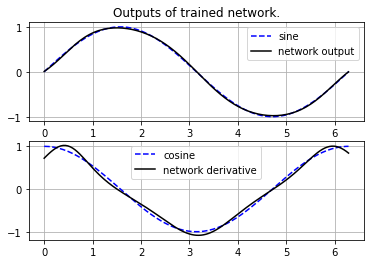

In [9]:
#################
# Make some plots
try:
    from pylab import *
    points = 128
    xaxis = [ 0. ] + [ k*2*pi/points for k in xrange(1, points + 1) ]
    sine = [ sin(x) for x in xaxis ]
    cosine = [ cos(x) for x in xaxis ]
    netsine = [ net([x])[0] for x in xaxis]
    netcosine = [ net.derivative([x])[0][0] for x in xaxis ]

    subplot(211)
    plot(xaxis, sine, 'b--', xaxis, netsine, 'k-')
    legend(('sine', 'network output'))
    grid(True)
    title('Outputs of trained network.')

    subplot(212)
    plot(xaxis, cosine, 'b--', xaxis, netcosine, 'k-')
    legend(('cosine', 'network derivative'))
    grid(True)
    show()
except ImportError:
    print "Cannot make plots. For plotting install matplotlib..."

# Parallel training

In [10]:
### Multiprocessing training example for ffnet ###
from ffnet import ffnet, mlgraph
from scipy import rand

In [11]:
# Generate random training data (large)
input = rand(10000, 10)
target = rand(10000, 1)

In [12]:
# Define net (large one)
conec = mlgraph((10,300,1))
net = ffnet(conec)

In [13]:
# Test training speed-up
# Note that the below *if* is necessary only on Windows
if __name__=='__main__':    
    from time import time
    from multiprocessing import cpu_count
    
    # Preserve original weights
    weights0 = net.weights.copy()
    
    print "TRAINING, this can take a while..."
    for n in range(1, cpu_count()+1):
        net.weights[:] = weights0  #Start always from the same point
        t0 = time()
        net.train_tnc(input, target, nproc = n, maxfun=50, messages=0)
        t1 = time()
        print '%s processes: %s s' %(n, t1-t0)

TRAINING, this can take a while...
1 processes: 21.9666740894 s
2 processes: 10.1439838409 s
3 processes: 8.87527704239 s
4 processes: 8.26030898094 s


# Black-Scholes option pricing

In [14]:
### stock problem example for ffnet ###

# Data and description for this example is borrowed from:
# http://www.scientific-consultants.com/nnbd.html
#
#
# Training data consists of Black-Scholes option prices
# for volatility levels running from 20 percent to 200 percent,
# for time remaining running from 5 to 15 days, and for strike price
# running from 70 dollars to 130 dollars. The stock price was set to
# 100 dollars and the interest rate to 0 percent when generating
# the data.
#
# The data is "difficult" in that (for a neural network to
# practically emulate Black-Scholes) a very tight fit is required.
# The R-squared should be at least 0.999999 or better, and the largest
# absolute error must be less than 0.05 dollars (the price increment
# for most options) or, better yet, less than 0.01 dollars.
#
#
# So let's try.
# Attention: training might be a long process since we train a big network.
from ffnet import ffnet, mlgraph, readdata
from numpy import array

In [15]:
# Generate standard layered network architecture and create network
conec = mlgraph((3,22,12,1))
net = ffnet(conec)

In [16]:
# Read training data omitting first column and first line
print "READING DATA..."
data = readdata( '/Volumes/PANZER/Github/learning-space/Datasets/04 - Linear Regression/black-scholes.dat',
                 usecols  = (1, 2, 3, 4),
                 skiprows =  1)
input =  data[:, :3] #first 3 columns
target = data[:, -1] #last column

READING DATA...


In [17]:
print "TRAINING NETWORK..."
import sys; sys.stdout.flush() #Just to ensure dislpaing the above messages here
net.train_tnc(input, target, maxfun = 5000, messages=1)

TRAINING NETWORK...


In [18]:
# Test network
print
print "TESTING NETWORK..."
output, regression = net.test(input, target, iprint = 0)
Rsquared = regression[0][2]
maxerr = abs( array(output).reshape( len(output) ) - array(target) ).max()
print "R-squared:           %s  (should be >= 0.999999)" %str(Rsquared)
print "max. absolute error: %s  (should be <= 0.05)" %str(maxerr)
print
print "Is ffnet ready for a stock?"


TESTING NETWORK...
R-squared:           0.999999492609  (should be >= 0.999999)
max. absolute error: 0.0491859182921  (should be <= 0.05)

Is ffnet ready for a stock?


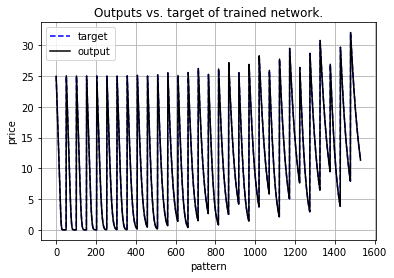

In [19]:
#####################################
# Make plot if matplotlib is avialble
try:
    from pylab import *
    plot( target, 'b--' )
    plot( output, 'k-' )
    legend(('target', 'output'))
    xlabel('pattern'); ylabel('price')
    title('Outputs vs. target of trained network.')
    grid(True)
    show()
except ImportError, e:
    print "Cannot make plots. For plotting install matplotlib.\n%s" % e

# XOR Problem

In [20]:
### XOR problem example for ffnet ###
from ffnet import ffnet, mlgraph

In [21]:
# Generate standard layered network architecture and create network
conec = mlgraph((2,2,1))
net = ffnet(conec)

In [22]:
# Define training data
input = [[0.,0.], [0.,1.], [1.,0.], [1.,1.]]
target  = [[1.], [0.], [0.], [1.]]

In [23]:
# Train network
#first find good starting point with genetic algorithm (not necessary, but may be helpful)
print "FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM..."
net.train_genetic(input, target, individuals=20, generations=500)
#then train with scipy tnc optimizer
print "TRAINING NETWORK..."
net.train_tnc(input, target, maxfun = 1000, messages=1)

FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM...
TRAINING NETWORK...


In [24]:
# Test network
print
print "TESTING NETWORK..."
output, regression = net.test(input, target, iprint = 2)


TESTING NETWORK...
Feed-forward neural network: 
inputs:     2 
hiddens:    2 
outputs:    1 
connections and biases:    9

Testing results for 4 testing cases:
OUTPUT 1 (node nr 5):
Targets vs. outputs:
   1      1.000000      0.999992
   2      0.000000      0.000006
   3      0.000000      0.000000
   4      1.000000      1.000003
Regression line parameters:
slope         =  0.999995
intercept     =  0.000003
r-value       =  1.000000
p-value       =  0.000000
slope stderr  =  0.000006
estim. stderr =  0.000006



In [25]:
# Save/load/export network
from ffnet import savenet, loadnet, exportnet
print "Network is saved..."
savenet(net, "xor.net")
print "Network is reloaded..."
net = loadnet("xor.net")
print "Network is tested again, but nothing is printed..."
output, regression = net.test(input, target, iprint = 0)
print
print "Exporting trained network to the fortran source..."
exportnet(net, "xor.f")
print "Done..."
print "Look at the generated xor.f file."
print "Note: you must compile xor.f along with the ffnet.f"
print "file which can be found in ffnet sources."

Network is saved...
Network is reloaded...
Network is tested again, but nothing is printed...

Exporting trained network to the fortran source...
Done...
Look at the generated xor.f file.
Note: you must compile xor.f along with the ffnet.f
file which can be found in ffnet sources.


# Pattern Recognition

In [26]:
### Digits recognition example for ffnet ###

# Training file (data/ocr.dat) contains 68 patterns - first 58
# are used for training and last 10 are used for testing.
# Each pattern contains 64 inputs which define 8x8 bitmap of
# the digit and last 10 numbers are the targets (10 targets for 10 digits).
# Layered network architecture is used here: (64, 10, 10, 10).

from ffnet import ffnet, mlgraph, readdata

In [27]:
# Generate standard layered network architecture and create network
conec = mlgraph((64,10,10,10))
net = ffnet(conec)

In [28]:
# Read data file
print "READING DATA..."
data = readdata( '/Volumes/PANZER/Github/learning-space/Datasets/03 - Clustering/ocr_dat.txt', delimiter = ' ' )
input =  data[:, :64] #first 64 columns - bitmap definition
target = data[:, 64:] #the rest - 10 columns for 10 digits

READING DATA...


In [29]:
# Train network with scipy tnc optimizer - 58 lines used for training
print "TRAINING NETWORK..."
net.train_tnc(input[:58], target[:58], maxfun = 2000, messages=1)

TRAINING NETWORK...


In [30]:
# Test network - remaining 10 lines used for testing
print
print "TESTING NETWORK..."
output, regression = net.test(input[58:], target[58:], iprint = 2)


TESTING NETWORK...
Feed-forward neural network: 
inputs:    64 
hiddens:   20 
outputs:   10 
connections and biases:  870

Testing results for 10 testing cases:
OUTPUT 1 (node nr 85):
Targets vs. outputs:
   1      1.000000      1.001101
   2      0.000000     -0.004047
   3      0.000000      0.000067
   4      0.000000     -0.000126
   5      0.000000      0.016843
   6      0.000000     -0.012481
   7      0.000000     -0.142786
   8      0.000000      0.828782
   9      0.000000     -0.034669
  10      0.000000     -0.000063
Regression line parameters:
slope         =  0.928710
intercept     =  0.072391
r-value       =  0.734717
p-value       =  0.015504
slope stderr  =  0.303169
estim. stderr =  0.287611

OUTPUT 2 (node nr 86):
Targets vs. outputs:
   1      0.000000     -0.000208
   2      1.000000      0.987324
   3      0.000000     -0.000404
   4      0.000000      0.000044
   5      0.000000      0.758051
   6      0.000000     -0.000667
   7      0.000000      0.053858
   

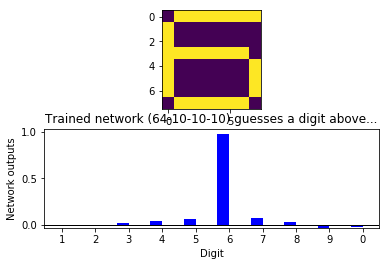

In [31]:
############################################################
# Make a plot of a chosen digit along with the network guess
try:
    from pylab import *
    from random import randint

    digitpat = randint(58, 67) #Choose testing pattern to plot

    subplot(211)
    imshow(input[digitpat].reshape(8,8), interpolation = 'nearest')

    subplot(212)
    N = 10  # number of digits / network outputs
    ind = arange(N)   # the x locations for the groups
    width = 0.35       # the width of the bars
    bar(ind, net(input[digitpat]), width, color='b') #make a plot
    xticks(ind+width/2., ('1', '2', '3', '4', '5', '6', '7', '8', '9', '0'))
    xlim(-width,N-width)
    axhline(linewidth=1, color='black')
    title("Trained network (64-10-10-10) guesses a digit above...")
    xlabel("Digit")
    ylabel("Network outputs")
    show()
except ImportError, e:
    print "Cannot make plots. For plotting install matplotlib.\n%s" % e